                       p (mbar)  Observation    Tpot (K)  Tdew (degC)  \
Date_Time                                                               
2009-01-01 00:00:00  996.545000    -8.215000  265.205000    -9.090000   
2009-01-01 00:30:00  996.516667    -8.363333  265.060000    -9.140000   
2009-01-01 01:00:00  996.500000    -7.763333  265.666667    -8.480000   
2009-01-01 01:30:00  996.550000    -8.366667  265.056667    -9.243333   
2009-01-01 02:00:00  996.663333    -8.853333  264.563333    -9.716667   

                        rh (%)  VPmax (mbar)  VPact (mbar)  VPdef (mbar)  \
Date_Time                                                                  
2009-01-01 00:00:00  93.350000      3.280000      3.065000      0.215000   
2009-01-01 00:30:00  94.066667      3.246667      3.053333      0.193333   
2009-01-01 01:00:00  94.533333      3.403333      3.216667      0.186667   
2009-01-01 01:30:00  93.333333      3.243333      3.026667      0.216667   
2009-01-01 02:00:00  93.400000  

<Axes: xlabel='Date_Time'>

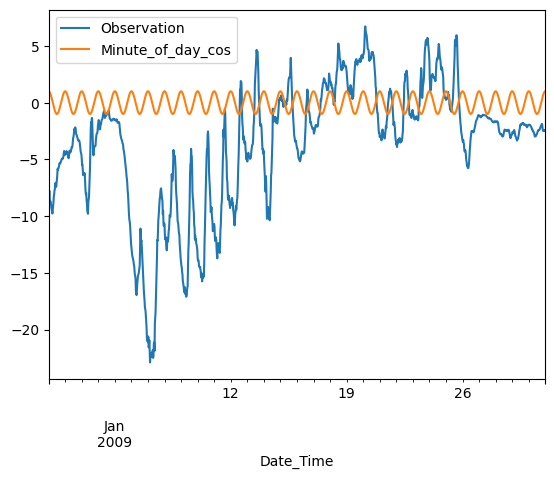

In [1]:
import forecasting_system.data_loader as dl
import forecasting_system.data_processor as dp
import forecasting_system.data_analyser as da
import forecasting_system.modeller as m
import datetime as dt
import numpy as np


observation_data = dl.read_data_file('jena_climate_2009_2016.csv')
observation_data = dp.format_jena_climate_data(observation_data, 'T (degC)', [])

# create basic calendar variables
observation_data['Minute_of_day'] = observation_data.index.to_series().dt.hour * 60 + observation_data.index.to_series().dt.minute
observation_data['Minute_of_day_cos'] = np.cos((observation_data['Minute_of_day']) * (2 * np.pi / 1440))
print(observation_data.head())
observation_data[['Observation', 'Minute_of_day_cos']][1:1440].plot()

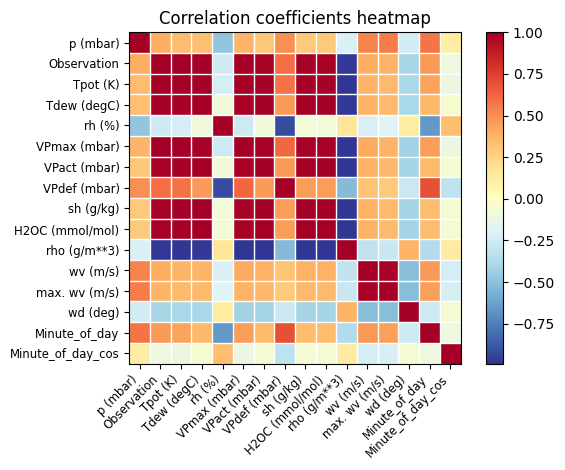

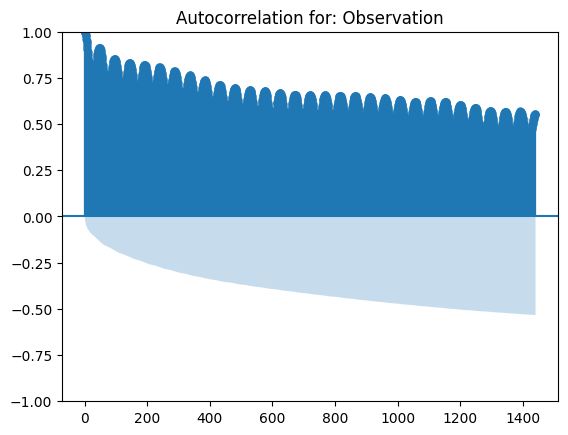

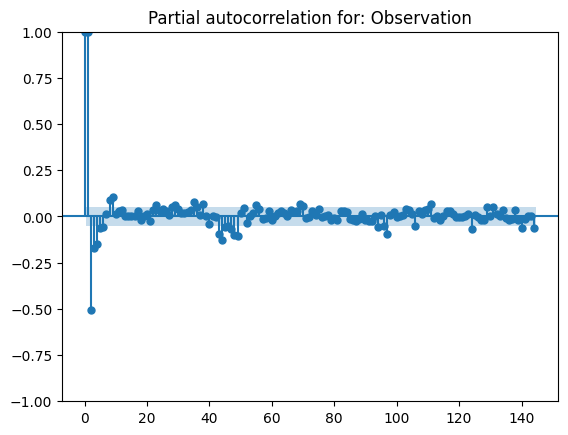

In [2]:
da.plot_correlation_heatmap(observation_data[1:100])
da.plot_autocorrelation(observation_data['Observation'][1:14400], 1440)
da.plot_partial_autocorrelation(observation_data['Observation'][1:1440], 144)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                11200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 11251 (43.95 KB)
Trainable params: 11251 (43.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


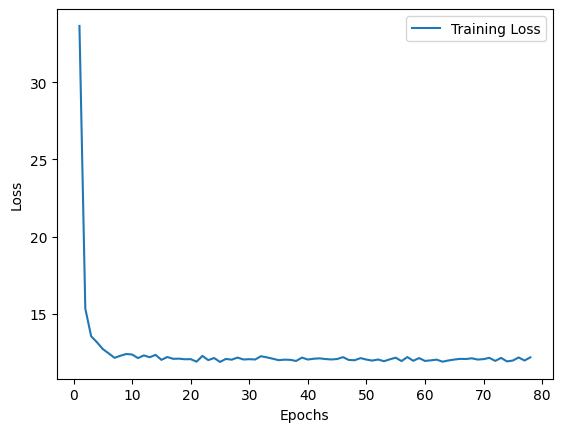

Trained Model (Lstm, {'normalise': False, 'Learning_rate': 0.01, 'Epochs': 200, 'Loss_function': 'mse', 'Plot_loss': True, 'variables': ['p (mbar)', 'VPact (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'Minute_of_day_cos']}) <keras.src.engine.sequential.Sequential object at 0x0000017DD9FAC590>


In [3]:
configuration = {
    # LSTM options
    'normalise': False,
    'Learning_rate': 0.01,
    'Epochs': 200,
    'Loss_function': 'mse',
    'Plot_loss': True,
    'variables': ['p (mbar)', 'VPact (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'Minute_of_day_cos']
}

model = m.create_model('Lstm', configuration)
m.train_model(model, observation_data, '2009-01-01', '2010-01-01')
print(model)

11/11 [==============================] - 0s 700us/step
{'MAE': 2.7218728001153294, 'RMSE': 3.648441692319417, 'MAPE': 2.854334844839724}


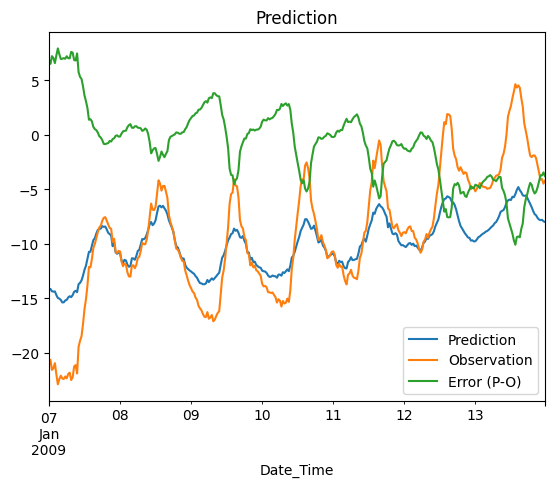

In [5]:
prediction = m.predict_from_model(model, observation_data, '2009-01-07', 14*24, dt.timedelta(minutes=30))
print(prediction.calculate_metrics())
prediction.plot()